In [1]:
import zipfile
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_b4 = '520677B4'
path_b5 = '520677B5'

In [3]:
def get_df_length_and_values(path):
    '''
    Reading, cleaning of CSV-file
    return = 2 pandas Series 1. Length, 2. Values

    '''
    df = pd.read_csv(f'../data/SignalExport/{path}.csv', header = None, index_col = 0, squeeze = True)
    df = str(pd.Series(data=df.index).tolist())
    df = re.split(';', df)[3:]
    
    length_p = []
    for i in df:
        if i != 'Values':
            length_p.append(i)
        else:
            break        
    
    length_p = length_p[:-1]
    length_p = [float(i) for i in length_p]    
    values = df[len(length_p)+3:][:-1]
    values = [float(i) for i in values]
    values = [i for i in values if i != 0]
    length_p = [i for i in length_p if i != 0]

    df = list(zip(length_p, values))
    df = pd.DataFrame(data=df, columns=['length_p','values'])
    length_p = df['length_p']
    values = df['values']
    return length_p, values

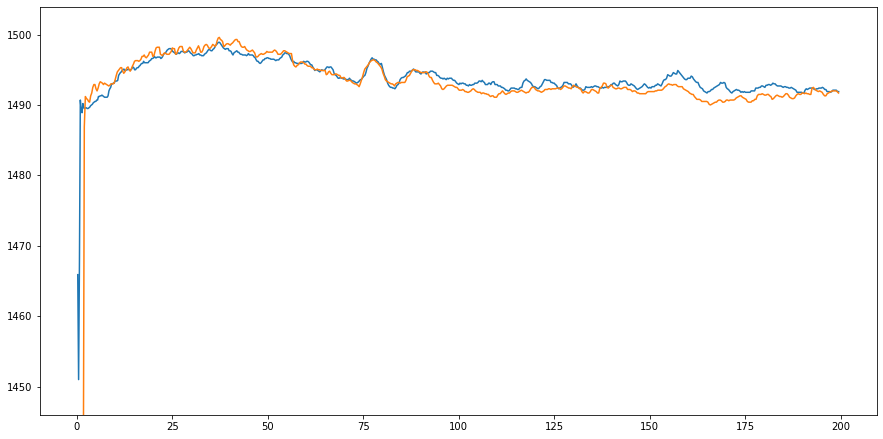

In [4]:
min = get_df_length_and_values(path_b4)[1].min()-5
max = get_df_length_and_values(path_b4)[1].max()+5

fig, ax = plt.subplots(figsize=(15,7.5))
ax.plot(get_df_length_and_values(path_b4)[0], get_df_length_and_values(path_b4)[1])
ax.plot(get_df_length_and_values(path_b5)[0], get_df_length_and_values(path_b5)[1])
plt.ylim(ymin=min, ymax=max)
plt.show()

In [5]:
values_b4 = get_df_length_and_values(path_b4)[1]
values_b5 = get_df_length_and_values(path_b5)[1]

In [6]:
def get_mean_0_until_100(values_b4, values_b5):
    values_b4 = values_b4[10:140].mean()
    values_b5 = values_b5[10:140].mean()
    return values_b4, values_b5

print(get_mean_0_until_100(values_b4, values_b5))

(1495.0253846153848, 1496.363846153846)
